In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-06-17 14:36:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   290MB/s    in 0.4s    

2025-06-17 14:36:26 (290 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

#going through the pizza_steak directory and listing the number of images
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [21]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)
Image shape: (512, 424, 3)


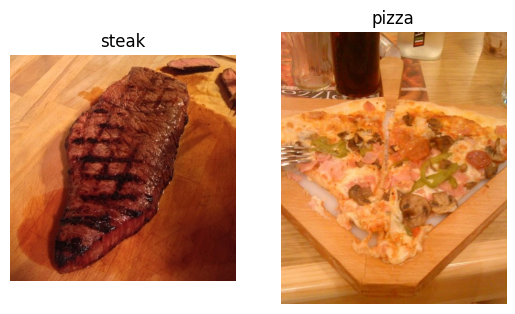

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [6]:
 import tensorflow as tf
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

 #set the seed
 tf.random.set_seed(42)

 #preprocessing the data by changing the pixels between 0 and 1
 train_datagen = ImageDataGenerator(rescale=1./255.)
 test_datagen = ImageDataGenerator(rescale=1./255.)

 #setting up the training and validation directories
 train_dir = "pizza_steak/train/"
 test_dir = "pizza_steak/test/"

 #import the data from the directories and turn it into batches
 train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode="binary")
 valid_data = test_datagen.flow_from_directory(test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode="binary")



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation
from tensorflow.keras.optimizers import Adam

#Creating CNN model
model_1 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),#input shape
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")#output shape
])

#compiling the model
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
len(train_data),len(valid_data)

(47, 16)

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.5018 - loss: 1.3324 - val_accuracy: 0.5540 - val_loss: 0.6634
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.6287 - loss: 0.6200 - val_accuracy: 0.6620 - val_loss: 0.6206
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8295 - loss: 0.4250 - val_accuracy: 0.6860 - val_loss: 0.6041
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9237 - loss: 0.2070 - val_accuracy: 0.7500 - val_loss: 0.5600
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.9926 - loss: 0.0620 - val_accuracy: 0.7400 - val_loss: 0.6373


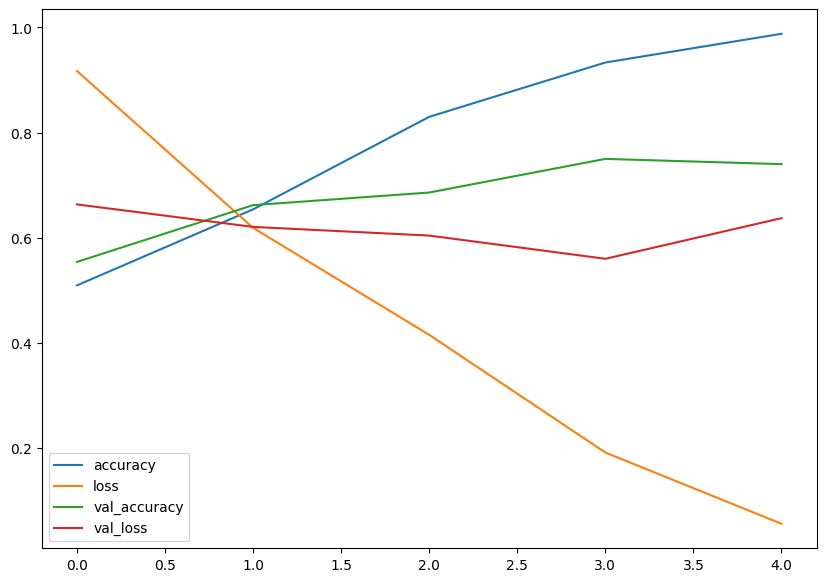

In [ ]:
#Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [ ]:
#plotting the loss and accuracy data seperately
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot the loss curve
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend();

  #plot the accuracy curve'
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend();

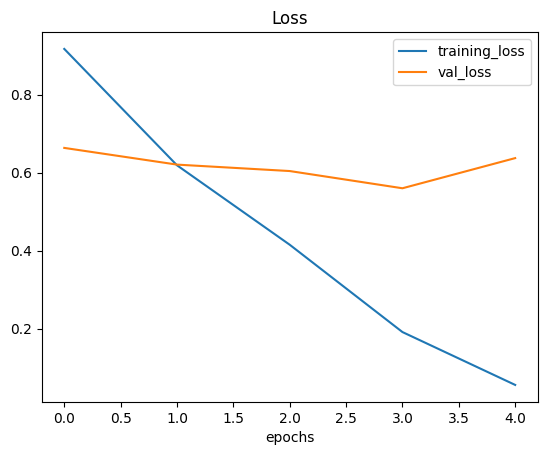

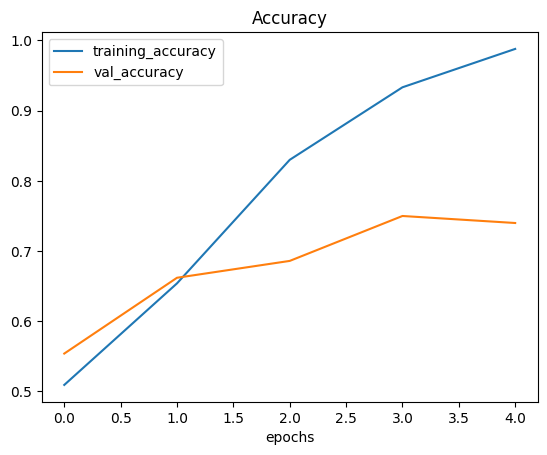

In [ ]:
plot_loss_curves(history_1)

In [ ]:
#checking out our first model's architecture
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

#Hypertuning the model

In [4]:
#Create 2nd CNN model
model_2 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),#input layer
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")#output layer
])

#complile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#fit the 2nd model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - accuracy: 0.5841 - loss: 0.6756 - val_accuracy: 0.6720 - val_loss: 0.6594
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.7554 - loss: 0.5268 - val_accuracy: 0.8500 - val_loss: 0.3853
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8124 - loss: 0.4216 - val_accuracy: 0.8420 - val_loss: 0.3621
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8121 - loss: 0.4206 - val_accuracy: 0.8700 - val_loss: 0.3280
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8532 - loss: 0.3763 - val_accuracy: 0.8200 - val_loss: 0.3769


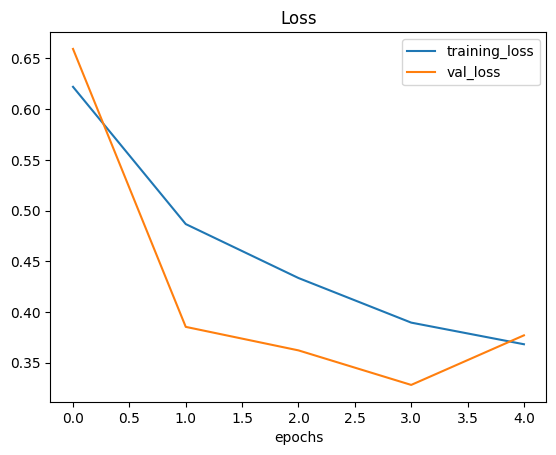

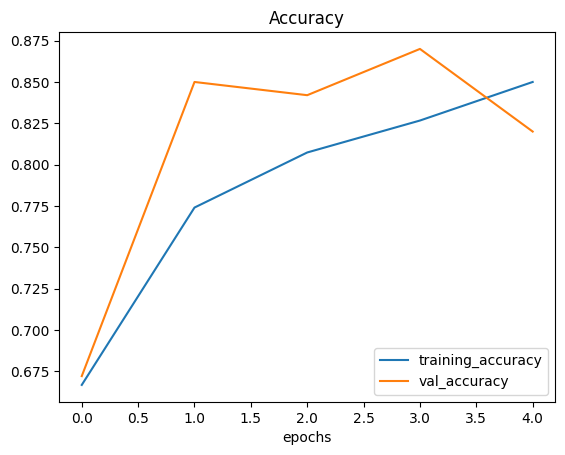

In [ ]:
plot_loss_curves(history_2)

In [ ]:
#checking the architecture of model 2
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

#Model 3 training by data augmentation

In [8]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=20,
                                             zoom_range=0.2,
                                             shear_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
#let's just not shuffle to visualise the augmented images
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
#get data batch samles
images,labels=next(train_data)
augmented_images,augmented_labels=next(train_data_augmented)


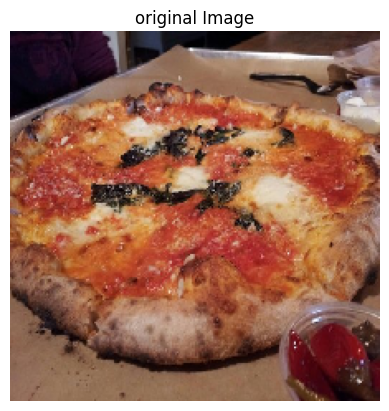

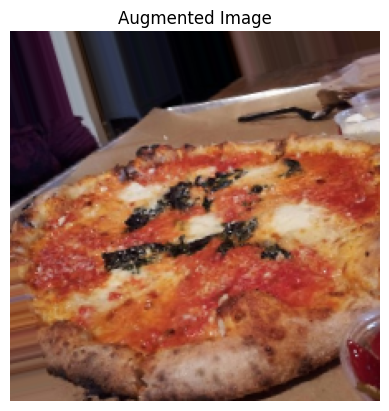

In [ ]:
#visualising original and augmented image
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"original Image")
plt.axis(False);
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [9]:
#let's shuffle the data and train the data
#let's just not shuffle to visualise the augmented images
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   shuffle=True)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [10]:
#Fit the augmented data to mode 3
model_3 =tf.keras.models.clone_model(model_2)
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 498ms/step - accuracy: 0.5904 - loss: 0.6681 - val_accuracy: 0.7400 - val_loss: 0.5247
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.7323 - loss: 0.5460 - val_accuracy: 0.8060 - val_loss: 0.4271
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.7582 - loss: 0.4874 - val_accuracy: 0.8180 - val_loss: 0.3902
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.8040 - loss: 0.4470 - val_accuracy: 0.8320 - val_loss: 0.3644
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.7823 - loss: 0.4763 - val_accuracy: 0.8500 - val_loss: 0.3372


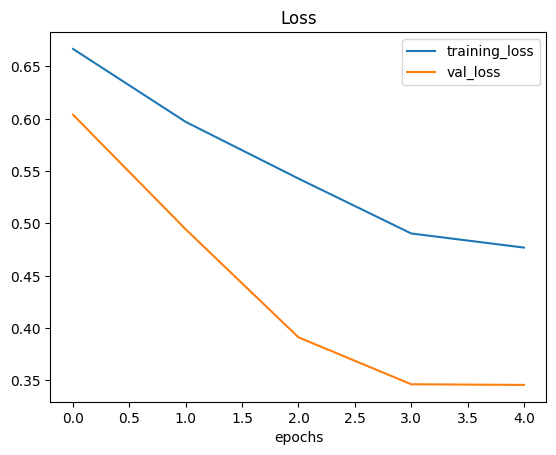

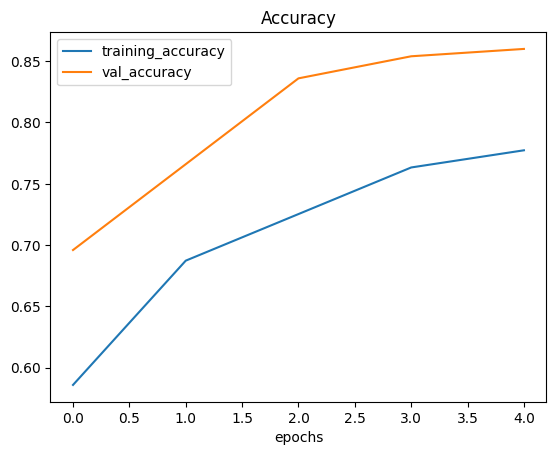

In [ ]:
plot_loss_curves(history_3)

In [11]:
model_4 = Sequential([
    Conv2D(10,3,activation="relu",input_shape =(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 530ms/step - accuracy: 0.5479 - loss: 0.6911 - val_accuracy: 0.6440 - val_loss: 0.6234
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 460ms/step - accuracy: 0.6757 - loss: 0.5973 - val_accuracy: 0.7940 - val_loss: 0.4701
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 449ms/step - accuracy: 0.7423 - loss: 0.5298 - val_accuracy: 0.8180 - val_loss: 0.3985
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.7814 - loss: 0.4724 - val_accuracy: 0.7920 - val_loss: 0.4576
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 485ms/step - accuracy: 0.7456 - loss: 0.5228 - val_accuracy: 0.8280 - val_loss: 0.4107


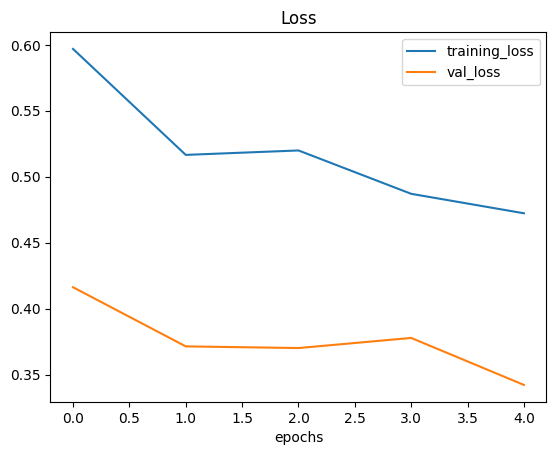

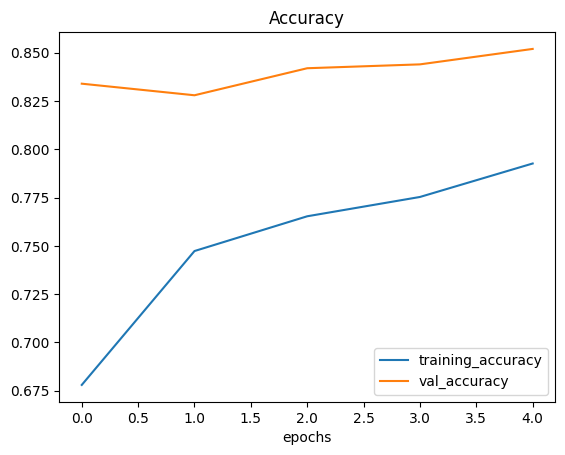

In [ ]:
plot_loss_curves(history_4)

In [17]:
#Save the best model@model_3
model_3.save("/content/drive/MyDrive/Models/CNN_Pizza_Steak_model_3.h5")

In [18]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Models/CNN_Pizza_Steak_model_3.h5")

In [19]:
model.evaluate(valid_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.8354 - loss: 0.3743


[0.33715352416038513, 0.8500000238418579]

#Making prediction with our trained model

--2025-06-17 14:58:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.05s   

2025-06-17 14:58:04 (38.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



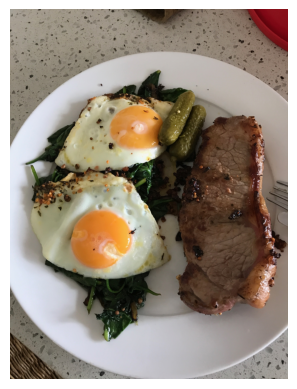

In [22]:
# View example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [23]:
#preprocessing the image
def load_and_prep_image(filename, img_shape=224):

  #read the target file
  img = tf.io.read_file(filename)

  #decode the image into tensor
  img = tf.image.decode_image(img, channels=3)

  #resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])

  #rescale the image
  img = img/255.
  return img

In [24]:
#loading our image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [28]:
#expand the shape to our model's compatibility
steak=tf.expand_dims(steak,axis=0)
steak.shape

TensorShape([1, 224, 224, 3])

In [32]:
pred = model_3.predict(steak)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.8853157]], dtype=float32)

In [30]:
class_names = ['Pizza','Steak']
class_names

['Pizza', 'Steak']

In [33]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class


'Steak'

In [38]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


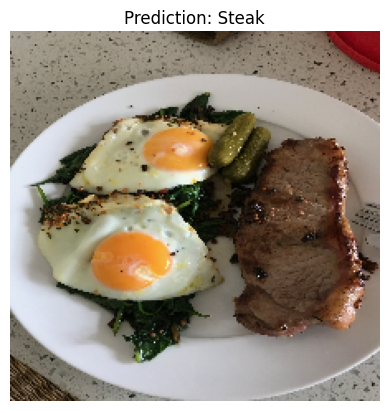

In [40]:
# Test our model on a custom image
pred_and_plot(model_3, "03-steak.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


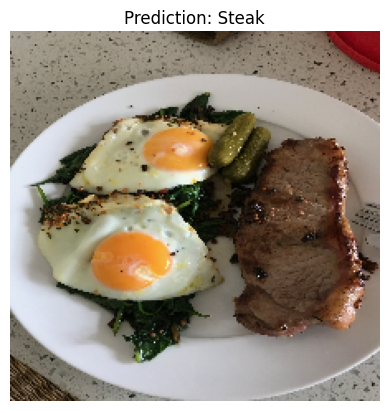

In [41]:
# Test our model on a custom image
pred_and_plot(model, "03-steak.jpeg", class_names)

--2025-06-17 15:18:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2025-06-17 15:18:46 (51.7 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


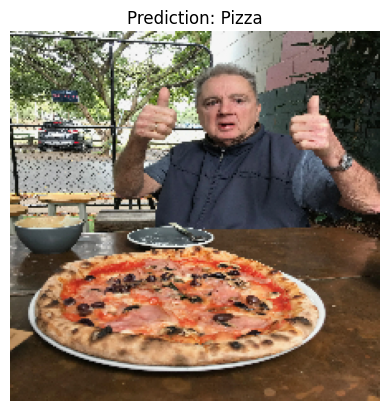

In [43]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_3, "03-pizza-dad.jpeg", class_names)